# Linear regression

slope: -1.751288, intercept: 103.105960, R-squared: 0.575461, p-value: 0.002647, standard error: 0.453536


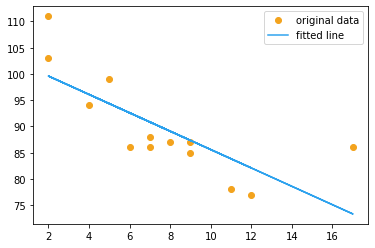

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

# car data
car_age_x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
car_speed_y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

# create a linear regression for car data by package "scipy"
slope, intercept, r, p, std_err = stats.linregress(car_age_x, car_speed_y)
print("slope: %f, intercept: %f, R-squared: %f, p-value: %f, standard error: %f"%(slope, intercept, r*r, p, std_err))

# linear function
def linfunc(x):
    return slope*x+intercept

# build up a linear regression model: the straight line
linmodel = list(map(linfunc, car_age_x))

# draw the plot
# .plot(x_value, y_value)
plt.plot(car_age_x, car_speed_y, 'o', label='original data', color='#F3A31D')
plt.plot(car_age_x, linmodel, 'r', label='fitted line', color='#2DA2EE')
plt.legend()
plt.show()

In [7]:
# pedict the car speed as the age of car is 10 year
pre_speed = linfunc(10)
print("Predict the speed of a 10 year-old car:", pre_speed)

Predict the speed of a 10 year-old car: 85.59308314937454


slope: 0.013917, intercept: 40.452283, R-squared: 0.000177, p-value: 0.955559, standard error: 0.246272


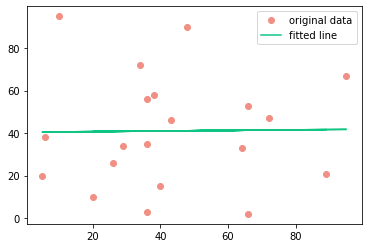

In [9]:
# a bad fit

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

slope, intercept, r, p, std_err = stats.linregress(x,y)
print("slope: %f, intercept: %f, R-squared: %f, p-value: %f, standard error: %f"%(slope, intercept, r*r, p, std_err))

linmodel_bad = list(map(linfunc, x))

plt.plot(x, y, 'o', label='original data', color='#F18F84')
plt.plot(x, linmodel_bad, 'r', label='fitted line', color='#10C583')
plt.legend()
plt.show()

# Polynomial regression

<function matplotlib.pyplot.show(*args, **kw)>

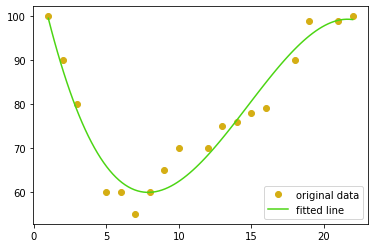

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# register 18 cars as they were passing a certain tollbooth
# x: the hour of the day, y: car speed
hour_x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
speed_y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

# build up polynomial regression model
polymodel = np.poly1d(np.polyfit(hour_x, speed_y, 3))
#print(polymodel)

# create 100 points from x=1 to x=22
polyline = np.linspace(1, 22, 100)
#print(polyline)

plt.plot(hour_x, speed_y, 'o', label='original data', color='#D5AE14')
plt.plot(polyline, polymodel(polyline), 'r', label='fitted line', color='#4CD514')
plt.legend()
plt.show

In [9]:
# R-squared: how well does the model fit the data point
# R-squared close to 1: there is a very good relationship
from sklearn.metrics import r2_score
# compare with the real y-value & y-value from the model
print("R-squared:", r2_score(speed_y, polymodel(hour_x)))

R-squared: 0.9432150416451027


In [10]:
# predict the speed of a car that passes the tollbooth at around 17 P.M
speed_predict_17pm = polymodel(17)
print("The predicted speed of a car passing at 17 P.M:", speed_predict_17pm)

The predicted speed of a car passing at 17 P.M: 88.87331269697987


R-squared: 0.009952707566680652


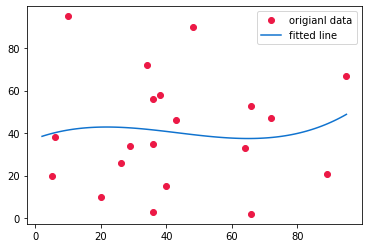

In [14]:
# a bad fit

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

polymodel_bad = np.poly1d(np.polyfit(x, y, 3))
polyline_bad = np.linspace(2, 95, 100)
print("R-squared:", r2_score(y, polymodel_bad(x)))
plt.plot(x, y, 'o', label='origianl data', color='#EC1946')
plt.plot(polyline_bad, polymodel_bad(polyline_bad), 'r', label='fitted line', color='#1073CF')
plt.legend()
plt.show()

# Multiple regression

In [2]:
import pandas as pd
# read data
car_data = pd.read_csv("cars.csv")
# show data infomation
car_data.info()
car_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [9]:
# to know the relationship between 'Weight'&'Volume' and 'CO2'
X = car_data[['Weight', 'Volume']]
y = car_data['CO2']

from sklearn import linear_model
# create a linear regression object
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predict the CO2 emission of a car where the weight is 2300kg, and the volume is 13000cm3
predict_CO2 = regr.predict([[2300, 1300]])
print("predicted CO2:", predict_CO2, "(as weight=23000kg, volume=13000cm3)")
#print(type(predict_CO2))

predicted CO2: [107.2087328] (as weight=23000kg, volume=13000cm3)


In [17]:
# the linear model function
weight_co = regr.coef_[0]
volume_co = regr.coef_[1]
function_str = "CO2 = "+str(weight_co)+"*Weight + "+str(volume_co)+"*Volume + "+str(regr.intercept_)
print("The linear model function:", function_str)

The linear model function: CO2 = 0.007550947270300689*Weight + 0.007805257527747124*Volume + 79.69471929115939


In [18]:
# R-squared: how the linear model fitting?
print("R-squaerd:", regr.score(X,y))

R-squaerd: 0.3765564043619988
